<a href="https://colab.research.google.com/github/FaizalMahmud/Mind_the_data_gap_MYCE2022/blob/main/Mind_the_(Data)_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# Brunei MYCE 2022 
## Workshop: Mind the (Data) Gap
## Date: 11th June 2022


***
# <ins>Workshop content</ins>

- Understanding statistical methods and techniques

***
# Common Python libraries for data exploration
## Pandas https://pandas.pydata.org
> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- A common library to analyse structured tabular data, e.g. excel, SQL tables etc.
    
## Numpy https://numpy.org
> The fundamental package for scientific computing with Python
- A common library for handling and manipulating arrays, pandas is using this in the background.

## SciPy https://scipy.org/
> Fundamental algorithms for scientific computing in Python
- Contains useful and optimized algorithms for modelling/analysing data

## Scikit-learn https://scikit-learn.org/
> - Simple and efficient tools for predictive data analysis
> - Accessible to everybody, and reusable in various contexts
> - Built on NumPy, SciPy, and matplotlib
> - Open source, commercially usable - BSD license
- Contains libraries for machine learning

## Other notable libraries for neural networks
- tensorflow https://www.tensorflow.org/
- keras https://keras.io/


***
# Common Python libraries for data visualisation
## Matplotlib https://matplotlib.org/
> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- A common library for 2d plotting and some 3d plotting capabilities.
    
## Seaborn https://seaborn.pydata.org/
> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- Nicer visualisation charts compared to matplotlib.

***
# Data wrangling using actual data
##Courtesy of Azam, Lead Data Scientist
### Data source: https://www.data.gov.bn/Pages/index.aspx

- Before we can explore the data, we need to read and reformat the data into something usable.
- This process is part of data engineering which will be covered during afternoon's session.
- For this workshop, we will be using data that is freely available from the data.gov.bn website.
- For this example, lets use the [Monthly Local Chicken Meat Production by District 2014-2020](https://www.data.gov.bn/Lists/dataset/mdisplay.aspx?ID=1009)
- We need to copy the link to the excel file and store it in a variable

In [ ]:
data_url = 'https://www.data.gov.bn/Lists/dataset/Attachments/1009/Monthly%20Local%20Chicken%20Meat%20Production%20by%20District%20(2014-2020).xlsx'
#data_url = '../data/Monthly Local Chicken Meat Production by District (2014-2020).xlsx'

import pandas as pd
data = pd.read_excel(data_url, header=None)

- We will be importing the data from www.data.gov.bn
- For this part we will be using Pandas to read and view the data

In [ ]:
pd.set_option('display.max_rows', 10)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,YEAR 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,District,Brunei/Muara,NaN,Tutong,NaN,Belait,NaN,Temburong,NaN,Total,NaN
3,NaN,NaN,Month,Quantity\n(Kg),Retail Value\n(B$),Quantity\n(Kg),Retail Value\n(B$),Quantity\n(Kg),Retail Value\n(B$),Quantity\n(Kg),Retail Value\n(B$),Quantity\n(Kg),Retail Value\n(B$)
4,NaN,NaN,January,787.9155,3631420.91697,569.7135,2625750.503169,687.2025,3167245.133131,10.359,47743.55788,2055.1905,9472160.111151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,September,943.8765,4016194.5075,777.3975,3307826.3625,510.5235,2172277.4925,8.1765,34791.0075,2239.974,9531089.37
127,NaN,NaN,October,1309.281,5561171.0475,490.1745,2082016.18875,717.675,3048324.5625,14.0595,59717.72625,2531.19,10751229.525
128,NaN,NaN,November,1004.4585,4394505.9375,626.604,2741392.5,506.532,2216077.5,7.9665,34853.4375,2145.561,9386829.375
129,NaN,NaN,December,1400.35734,6397271.317888,496.32,2267345.348077,632.5425,2889652.431568,12.6945,57992.455515,2541.91434,11612261.553048


- As you can see, typically the data collected may require further manipulation 
- Sprinkling a bit of data engineering magic 


In [ ]:
# Get the district list
districts = data.iloc[2, 3:].dropna().to_list()

# prepare empty dataframe
data_edit = pd.DataFrame()

# Loop through the years
for rowno in range(0, 115, 19):
    # get year 
    year = int(data.iloc[rowno, 2][-4:])
    
    # Loop per district
    for i, district in enumerate(districts):
        # Get data per district
        subdata = data.iloc[rowno + 4:rowno + 16, [2, 3 + i * 2, 4 + i * 2]]
        subdata.columns = ['Month', 'Quantity_kg', 'Retail_value_BND']
        subdata['District'] = district
        subdata['Year'] = year
        data_edit = pd.concat((data_edit, subdata))

data_edit = data_edit.reset_index(drop=True)
data_edit.head(10)

,Month,Quantity_kg,Retail_value_BND,District,Year
0,January,787.9155,3631420.91697,Brunei/Muara,2014
1,February,1091.835,5032154.408537,Brunei/Muara,2014
2,March,847.3395,3905299.977059,Brunei/Muara,2014
3,April,1098.573,5063209.152527,Brunei/Muara,2014
4,May,870.714,4013030.626125,Brunei/Muara,2014
5,June,1057.8315,4875435.799561,Brunei/Muara,2014
6,July,872.7915,4022605.60841,Brunei/Muara,2014
7,August,1150.035,5300392.179424,Brunei/Muara,2014
8,September,845.718,3897826.651535,Brunei/Muara,2014
9,October,1104.3675,5089915.402758,Brunei/Muara,2014


***
# Crash course into Statistics
# Exploring the data... but first some theories
## Some definitions
- ## mean
    - average value of the distribution
- ## median
    - the midpoint value in the distribution
    - for a normal distribution, **median** = **mean**
- ## σ (standard deviation)
    - a measure of data spread in the distribution
    - Below is how the data is being distributed for a normal distributed data. 
    - ![standard_dev](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/440px-Standard_deviation_diagram.svg.png)
    - Image source (https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/440px-Standard_deviation_diagram.svg.png)
    - see also the 68-95-99.7 rule ([wiki](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule))
- ## Q1 & Q3 (First and third quartile)
    - values at which 25% and 75% of the data is less than the indicated value
- ## IQR (Inter-quartile range)
    - the distance between Q1 and Q3
- ## Outliers
    - the data that is more than **Q3 + 1.5 * IQR** or less than **Q1 - 1.5  * IQR**


***
# Exploring the data
- Since we have the data in pandas dataframe, let's start to investigate it via pandas

In [ ]:
# Display the data type via info()
data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             420 non-null    object
 1   Quantity_kg       420 non-null    object
 2   Retail_value_BND  420 non-null    object
 3   District          420 non-null    object
 4   Year              420 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 16.5+ KB


In [ ]:
# Only the year showed up, let's fix these
data_edit.loc[:, ['Quantity_kg', 'Retail_value_BND']] = data_edit[['Quantity_kg', 'Retail_value_BND']].astype(float)
data_edit.describe()

,Quantity_kg,Retail_value_BND,Year
count,420.000000,4.200000e+02,420.000000
mean,815.552421,3.479278e+06,2017.000000
std,693.075552,3.044834e+06,2.002385
min,6.445500,1.814177e+03,2014.000000
25%,386.648250,1.504634e+06,2015.000000
50%,631.770000,2.821432e+06,2017.000000
75%,1048.004625,4.447224e+06,2019.000000
max,2541.914340,1.161226e+07,2020.000000


In [ ]:
data_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             420 non-null    object 
 1   Quantity_kg       420 non-null    float64
 2   Retail_value_BND  420 non-null    float64
 3   District          420 non-null    object 
 4   Year              420 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 16.5+ KB


***
#Exploratory Data Analysis
##The many ways to visualise and explore data

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


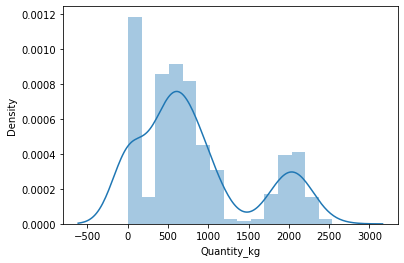

In [ ]:
sns.distplot(data_edit['Quantity_kg'])

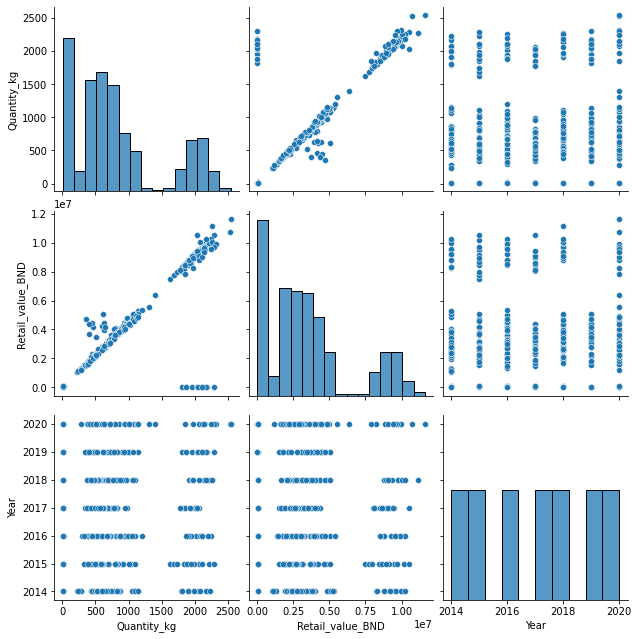

In [ ]:
sns.pairplot(data_edit,height = 3)

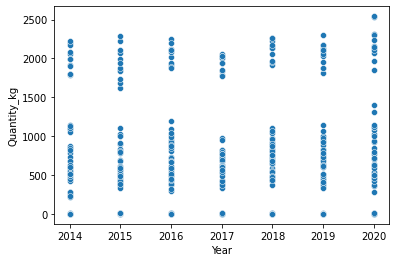

In [ ]:
sns.scatterplot(x = "Year", y = "Quantity_kg", data = data_edit)

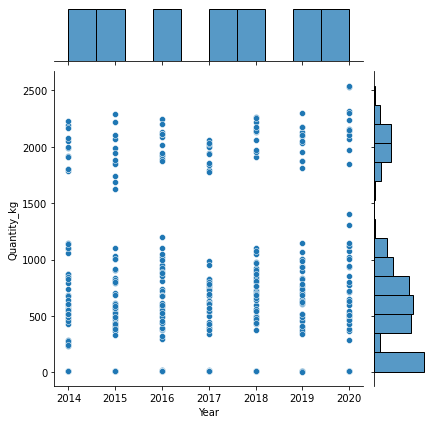

In [ ]:
sns.jointplot(x = "Year", y = "Quantity_kg", data = data_edit)

In [ ]:
data_edit_3 = data_edit_2.drop(data_edit_2.index[3])
data_edit_3

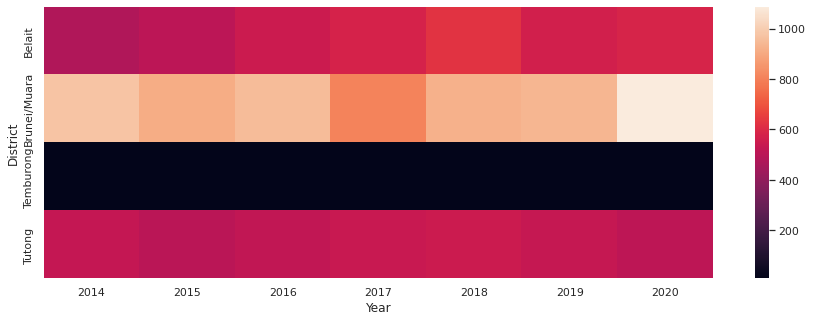

In [ ]:
sns.heatmap(data_edit_3)

In [ ]:
data_edit_3 = data_edit_2.reset_index()

[Text(0, 0, 'Brunei/Muara'),
 Text(0, 0, 'Tutong'),
 Text(0, 0, 'Belait'),
 Text(0, 0, 'Temburong'),
 Text(0, 0, 'Total')]

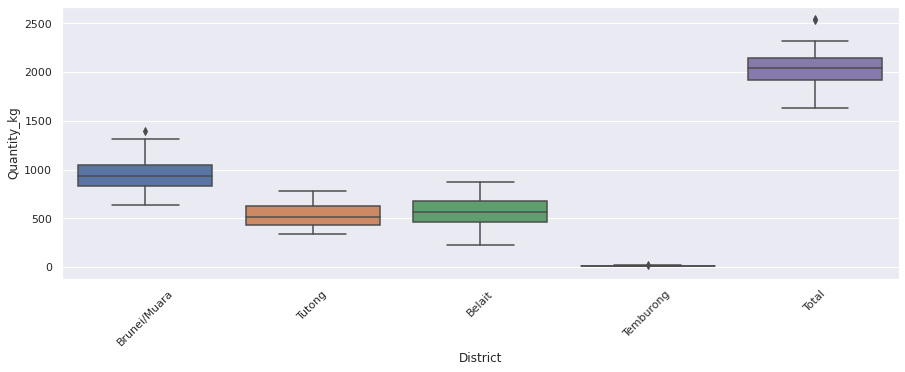

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='District', y='Quantity_kg', data=data_edit)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [ ]:
data_edit.drop(data_edit[data_edit['District'] == 'Total'].index, inplace = True)

[Text(0, 0, 'Brunei/Muara'),
 Text(0, 0, 'Tutong'),
 Text(0, 0, 'Belait'),
 Text(0, 0, 'Temburong')]

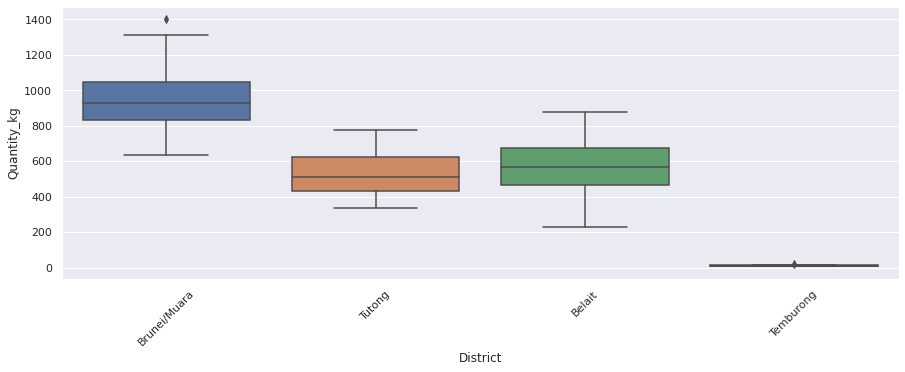

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='District', y='Quantity_kg', data=data_edit)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'Brunei/Muara'),
 Text(0, 0, 'Tutong'),
 Text(0, 0, 'Belait'),
 Text(0, 0, 'Temburong'),
 Text(0, 0, 'Total')]

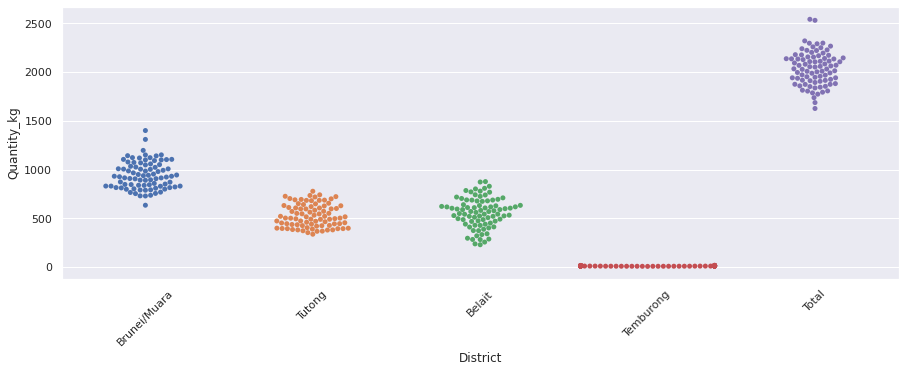

In [ ]:
ax = sns.swarmplot(x='District', y = 'Quantity_kg', data = data_edit)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

***
Based on the previous visualisations, can you spot the problems? 

***
Let us look at the raw data